In [1]:
import math
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.core.algorithms import mode
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.python.keras.backend import concatenate
from sklearn.metrics import mean_squared_error
from tensorflow.python.keras.callbacks import History
#from series_to_supervised import series_to_supervised
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM

In [2]:
def rename (dataset_1,dataset_2,dataset_3):
    nn_1 = []
    lt_1 = list(dataset_1)
    for i in range(len(lt_1)):
        nn_1.append(lt_1[i]+'_1')
    dataset_1.columns = nn_1
    nn_2 = []
    lt_2 = list(dataset_2)
    for i in range(len(lt_2)):
        nn_2.append(lt_2[i]+'_2')
    dataset_2.columns = nn_2
    nn_3 = []
    lt_3 = list(dataset_3)
    for i in range(len(lt_3)):
        nn_3.append(lt_3[i]+'_3')
    dataset_3.columns = nn_3

In [75]:
def values (dataset):
    dataset['rl_wave'] = dataset['wave']
    dataset= dataset.drop(['wave'],axis=1)
    values = dataset.values #数值特征变量
    # convert series to supervised learning
    def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
        n_vars = 1 if type(data) is list else data.shape[1]
        df = pd.DataFrame(data)
        cols, names = list(), list()
        # input sequence (t-n, ... t-1)
        for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(df.shift(-i))
            if i == 0:
                names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
            else:
                names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        # put it all together
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        # drop rows with NaN values
        if dropnan:
            agg.dropna(inplace=True)
        return agg
    # ensure all data is float
    values = values.astype('float32')
    # normalize features 歸一化
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    # frame as supervised learning
    reframed = series_to_supervised(scaled, 1, 1)
    # drop columns we don't want to predict
    reframed.drop(reframed.columns[[range(len(list(dataset)),len(list(dataset))*2)]], axis=1, inplace=True)
    
    # split into train and test sets
    values = reframed.values
    n_train_hours = int(len(values)*0.7)
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]
    # split into input and outputs
    train_X, train_y = train[:,:-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    return(train_X ,test_X,train_y,test_y)
    

In [32]:
dataset_0 = pd.read_csv("D:/openpose_data/揮手測試/揮手_左右/揮手測試_ALL.csv", header= None) 
dataset_1 = pd.read_csv("D:/openpose_data/揮手測試/揮手_左右/揮手測試_相關距離.csv") 
dataset_2 = pd.read_csv("D:/openpose_data/揮手測試/揮手_左右/揮手測試_移動距離_1.csv") 
dataset_3 = pd.read_csv("D:/openpose_data/揮手測試/揮手_左右/揮手測試_關節角度.csv") 
dataset_4 = pd.read_csv("D:/openpose_data/揮手測試/揮手_左右/揮手測試_方向.csv") 
dataset_5 = pd.read_csv("D:/openpose_data/揮手測試/揮手_左右/揮手測試_關節向量.csv") 

In [116]:
dataset_0 = pd.read_csv("D:/openpose_data/揮手測試/揮手_右手向右/揮手測試_all_標記.csv")#, header= None) 
dataset_1 = pd.read_csv("D:/openpose_data/揮手測試/揮手_右手向右/揮手測試_相關距離.csv") 
dataset_2 = pd.read_csv("D:/openpose_data/揮手測試/揮手_右手向右/揮手測試_移動距離_1.csv") 
dataset_3 = pd.read_csv("D:/openpose_data/揮手測試/揮手_右手向右/揮手測試_關節角度.csv") 
dataset_4 = pd.read_csv("D:/openpose_data/揮手測試/揮手_右手向右/揮手測試_關節向量.csv") 
rename(dataset_1,dataset_2,dataset_3)
dataset_rr = pd.concat([dataset_0,dataset_1,dataset_2,dataset_3,dataset_4],axis= 1).dropna(axis=0)
dataset_rr = dataset_rr[50:1035]
train_X_rr ,test_X_rr ,train_y_rr ,test_y_rr = values(dataset_rr)

C:\Users\DodoLu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [128]:
dataset_0 = pd.read_csv("D:/openpose_data/揮手測試/揮手_右手向左/揮手測試_all_標記.csv")#, header= None) 
dataset_1 = pd.read_csv("D:/openpose_data/揮手測試/揮手_右手向左/揮手測試_相關距離.csv") 
dataset_2 = pd.read_csv("D:/openpose_data/揮手測試/揮手_右手向左/揮手測試_移動距離_1.csv") 
dataset_3 = pd.read_csv("D:/openpose_data/揮手測試/揮手_右手向左/揮手測試_關節角度.csv") 
dataset_4 = pd.read_csv("D:/openpose_data/揮手測試/揮手_右手向左/揮手測試_關節向量.csv") 
rename(dataset_1,dataset_2,dataset_3)
dataset_rl = pd.concat([dataset_0,dataset_1,dataset_2,dataset_3,dataset_4],axis= 1).dropna(axis=0)
dataset_rl = dataset_rl[50:970]
train_X_rl ,test_X_rl ,train_y_rl ,test_y_rl = values(dataset_rl)
train_y_rl[train_y_rl ==1] = 2
test_y_rl[test_y_rl ==1] = 2

C:\Users\DodoLu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [118]:
dataset_0 = pd.read_csv("D:/openpose_data/揮手測試/揮手_左手向右/揮手測試_all_標記.csv")#, header= None) 
dataset_1 = pd.read_csv("D:/openpose_data/揮手測試/揮手_左手向右/揮手測試_相關距離.csv") 
dataset_2 = pd.read_csv("D:/openpose_data/揮手測試/揮手_左手向右/揮手測試_移動距離_1.csv") 
dataset_3 = pd.read_csv("D:/openpose_data/揮手測試/揮手_左手向右/揮手測試_關節角度.csv") 
dataset_4 = pd.read_csv("D:/openpose_data/揮手測試/揮手_左手向右/揮手測試_關節向量.csv") 
rename(dataset_1,dataset_2,dataset_3)
dataset_lr = pd.concat([dataset_0,dataset_1,dataset_2,dataset_3,dataset_4],axis= 1).dropna(axis=0)
dataset_lr = dataset_lr[50:950]
train_X_lr ,test_X_lr ,train_y_lr ,test_y_lr = values(dataset_lr)
train_y_lr[train_y_lr ==1] = 3
test_y_lr[test_y_lr ==1] = 3

C:\Users\DodoLu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [119]:
dataset_0 = pd.read_csv("D:/openpose_data/揮手測試/揮手_左手向左/揮手測試_all_標記.csv")#, header= None) 
dataset_1 = pd.read_csv("D:/openpose_data/揮手測試/揮手_左手向左/揮手測試_相關距離.csv") 
dataset_2 = pd.read_csv("D:/openpose_data/揮手測試/揮手_左手向左/揮手測試_移動距離_1.csv") 
dataset_3 = pd.read_csv("D:/openpose_data/揮手測試/揮手_左手向左/揮手測試_關節角度.csv") 
dataset_4 = pd.read_csv("D:/openpose_data/揮手測試/揮手_左手向左/揮手測試_關節向量.csv") 
rename(dataset_1,dataset_2,dataset_3)
dataset_ll = pd.concat([dataset_0,dataset_1,dataset_2,dataset_3,dataset_4],axis= 1).dropna(axis=0)
dataset_ll = dataset_ll[50:1040]
train_X_ll ,test_X_ll ,train_y_ll ,test_y_ll = values(dataset_ll)
train_y_ll[train_y_ll ==1] = 4
test_y_ll[test_y_ll ==1] = 4

C:\Users\DodoLu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [129]:
train_X = np.concatenate((train_X_rr ,train_X_rl ,train_X_lr ,train_X_ll))
test_X = np.concatenate((test_X_rr ,test_X_rl ,test_X_lr ,test_X_ll))
train_y = np.concatenate((train_y_rr ,train_y_rl ,train_y_lr ,train_y_ll))
test_y = np.concatenate((test_y_rr ,test_y_rl ,test_y_lr ,test_y_ll))

Epoch 1/50
19/19 - 3s - loss: 1.0905 - val_loss: 0.8832 - 3s/epoch - 178ms/step
Epoch 2/50
19/19 - 0s - loss: 0.9587 - val_loss: 0.9124 - 306ms/epoch - 16ms/step
Epoch 3/50
19/19 - 0s - loss: 0.9335 - val_loss: 0.7872 - 312ms/epoch - 16ms/step
Epoch 4/50
19/19 - 0s - loss: 0.8524 - val_loss: 1.2002 - 305ms/epoch - 16ms/step
Epoch 5/50
19/19 - 0s - loss: 0.9148 - val_loss: 1.0571 - 304ms/epoch - 16ms/step
Epoch 6/50
19/19 - 0s - loss: 0.9032 - val_loss: 1.3846 - 310ms/epoch - 16ms/step
Epoch 7/50
19/19 - 0s - loss: 1.3210 - val_loss: 0.8087 - 304ms/epoch - 16ms/step
Epoch 8/50
19/19 - 0s - loss: 1.0299 - val_loss: 0.9340 - 301ms/epoch - 16ms/step
Epoch 9/50
19/19 - 0s - loss: 0.9538 - val_loss: 0.8070 - 305ms/epoch - 16ms/step
Epoch 10/50
19/19 - 0s - loss: 0.8729 - val_loss: 0.7364 - 298ms/epoch - 16ms/step
Epoch 11/50
19/19 - 0s - loss: 0.7256 - val_loss: 0.6100 - 305ms/epoch - 16ms/step
Epoch 12/50
19/19 - 0s - loss: 0.5756 - val_loss: 0.5399 - 322ms/epoch - 17ms/step
Epoch 13/50
19/

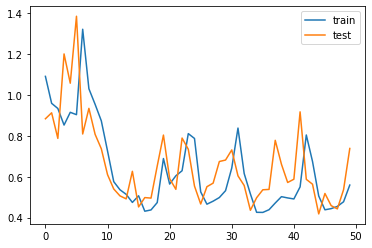

Epoch 1/50
37/37 - 4s - loss: 1.0198 - val_loss: 0.8589 - 4s/epoch - 95ms/step
Epoch 2/50
37/37 - 0s - loss: 0.9579 - val_loss: 0.8534 - 149ms/epoch - 4ms/step
Epoch 3/50
37/37 - 0s - loss: 0.9120 - val_loss: 0.8902 - 159ms/epoch - 4ms/step
Epoch 4/50
37/37 - 0s - loss: 0.8974 - val_loss: 0.7798 - 158ms/epoch - 4ms/step
Epoch 5/50
37/37 - 0s - loss: 0.8200 - val_loss: 0.9691 - 170ms/epoch - 5ms/step
Epoch 6/50
37/37 - 0s - loss: 1.0124 - val_loss: 0.7108 - 170ms/epoch - 5ms/step
Epoch 7/50
37/37 - 0s - loss: 0.7359 - val_loss: 0.6789 - 158ms/epoch - 4ms/step
Epoch 8/50
37/37 - 0s - loss: 0.7172 - val_loss: 0.6802 - 160ms/epoch - 4ms/step
Epoch 9/50
37/37 - 0s - loss: 0.7237 - val_loss: 0.6288 - 167ms/epoch - 5ms/step
Epoch 10/50
37/37 - 0s - loss: 0.6154 - val_loss: 0.6029 - 168ms/epoch - 5ms/step
Epoch 11/50
37/37 - 0s - loss: 0.5627 - val_loss: 0.5981 - 179ms/epoch - 5ms/step
Epoch 12/50
37/37 - 0s - loss: 0.5867 - val_loss: 0.6046 - 160ms/epoch - 4ms/step
Epoch 13/50
37/37 - 0s - lo

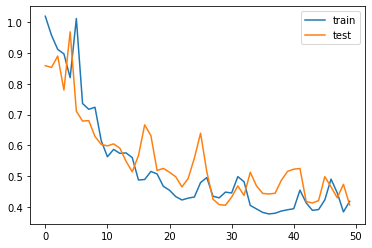

In [130]:
# design network
model = Sequential()
model.add(LSTM(500, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=144, validation_data=(test_X, test_y), verbose=2, shuffle=False)#False
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


Test RMSE: 0.624


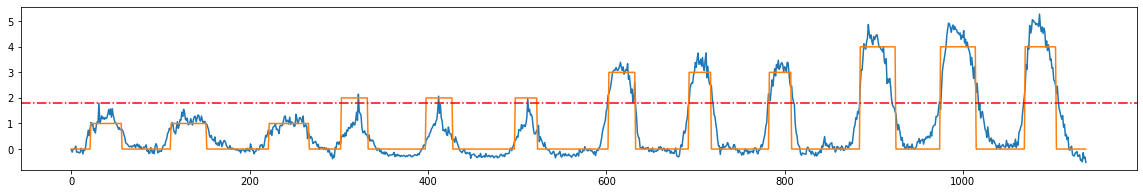

In [186]:
# make a prediction
yhat = model.predict(test_X)
rmse = math.sqrt(mean_squared_error(yhat, test_y))
print('Test RMSE: %.3f' % rmse)
plt.figure(figsize=(20, 3))
plt.plot(yhat)
plt.plot(test_y)
plt.axhline(y=1.8 ,color = 'red' , linestyle="-.")
plt.show()

In [177]:
yhat_l = pd.DataFrame(yhat)

In [179]:
yhat_l[(yhat_l[0]>1.7)&(yhat_l[0]<2.1)]

,0
31,1.794958
412,2.068179
414,1.729931
512,1.969945
602,2.085894
630,1.824054
631,1.953032
693,1.849637
719,1.969758
720,1.726448


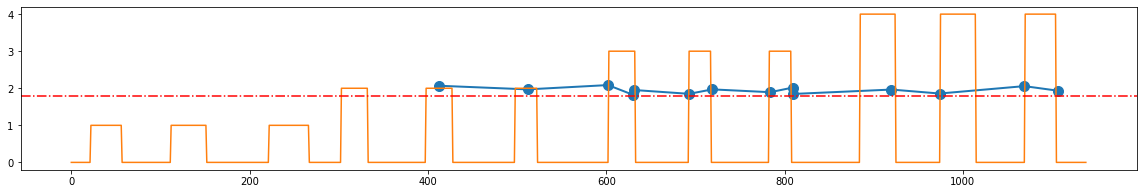

In [197]:
plt.figure(figsize=(20, 3))
plt.plot(yhat_l[(yhat_l[0]>1.8)&(yhat_l[0]<2.1)], linewidth="2", markersize="10", marker="o")
plt.plot(test_y)
plt.axhline(y=1.8 ,color = 'red' , linestyle="-.")
plt.show()

In [12]:
df_drop = dataset.drop(['right_1','left_1','wave_1','right_2','left_2','wave_2','right_3','left_3','wave_3'],axis=1)#,'RElbow_3','RWrist_3'

In [51]:
df_drop = dataset_rl.drop(['wave'],axis=1)

In [53]:
#dataset = pd.read_csv("D:/openpose_data/UT_Kinect/RGB/s01_e01_all_標記walk.csv") #读取数据
#dataset.columns = ["pm25", "dew",  "temp", "press", "wnd_dir", "wnd_spd", "snow", "rain"] #重命名表头
values = df_drop.values #数值特征变量
values


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.68000000e+02, 1.74000000e+02, 0.00000000e+00],
       [6.86634583e+02, 1.35156116e+01, 5.43501675e-02, ...,
        1.68000000e+02, 1.75000000e+02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.69000000e+02, 1.76000000e+02, 0.00000000e+00],
       ...,
       [7.70557190e+02, 5.79076042e+01, 5.54537177e-01, ...,
        2.70000000e+01, 2.70000000e+01, 0.00000000e+00],
       [7.70460754e+02, 5.80121994e+01, 5.66528141e-01, ...,
        2.40000000e+01, 2.40000000e+01, 0.00000000e+00],
       [7.65278198e+02, 5.83039970e+01, 5.39040208e-01, ...,
        1.90000000e+01, 1.90000000e+01, 0.00000000e+00]])

正規化----------------------------------------------------------------------------------------------------------------------------------------------------------

In [54]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [55]:
# ensure all data is float
values = values.astype('float32')
# normalize features 歸一化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[range(len(list(df_drop)),len(list(df_drop))*2)]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.000000   0.000000   0.000000   1.000000   0.576470   0.641135   
2   0.885112   0.032619   0.056114   0.992127   0.559552   0.681631   
3   0.000000   0.000000   0.000000   0.976771   0.551361   0.684953   
4   0.000000   0.000000   0.000000   0.969124   0.559819   0.722916   
5   0.000000   0.000000   0.000000   0.968534   0.576411   0.771644   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var121(t-1)  var122(t-1)  \
1   0.486262   0.250001   0.447765    0.124655  ...          0.0          0.0   
2   0.508460   0.239231   0.451700    0.147991  ...          0.0          0.0   
3   0.530733   0.234036   0.463167    0.209875  ...          0.0          0.0   
4   0.530897   0.228729   0.474329    0.240804  ...          0.0          0.0   
5   0.542105   0.244658   0.479959    0.271581  ...          0.0          0.0   

   var123(t-1)  var124(t-1)  var125(t-1)  var126(t-1)  var127(t-1)  \
1          0.0  

C:\Users\DodoLu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [20]:
test1 = scaler.inverse_transform(scaled)#規一化還原成原本數值
test1 

array([[419.45667   , 335.73663   ,   0.8106    , ..., 177.        ,
        177.        ,   0.        ],
       [434.9435    , 341.0321    ,   0.8618577 , ..., 178.        ,
        178.        ,   0.        ],
       [440.3599    , 346.12805   ,   0.90867186, ..., 175.99998   ,
        177.        ,   0.        ],
       ...,
       [602.7388    , 367.18945   ,   0.8792608 , ..., 167.99998   ,
        167.99998   ,   0.        ],
       [602.8786    , 362.1026    ,   0.90722895, ..., 166.00002   ,
        167.        ,   0.        ],
       [607.92145   , 361.9332    ,   0.91608   , ..., 167.        ,
        167.        ,   0.        ]], dtype=float32)

In [ ]:
test1 = scaler.inverse_transform(scaled)

In [56]:
# split into train and test sets
values = reframed.values
n_train_hours = int(len(values)*0.7)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:,:-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(728, 1, 129) (728,) (313, 1, 129) (313,)


Epoch 1/50
11/11 - 3s - loss: 0.6254 - val_loss: 0.3843 - 3s/epoch - 277ms/step
Epoch 2/50
11/11 - 0s - loss: 0.5317 - val_loss: 0.3301 - 227ms/epoch - 21ms/step
Epoch 3/50
11/11 - 0s - loss: 0.4667 - val_loss: 0.3349 - 205ms/epoch - 19ms/step
Epoch 4/50
11/11 - 0s - loss: 0.4431 - val_loss: 0.3827 - 199ms/epoch - 18ms/step
Epoch 5/50
11/11 - 0s - loss: 0.4582 - val_loss: 0.3832 - 195ms/epoch - 18ms/step
Epoch 6/50
11/11 - 0s - loss: 0.4428 - val_loss: 0.3299 - 219ms/epoch - 20ms/step
Epoch 7/50
11/11 - 0s - loss: 0.4032 - val_loss: 0.3136 - 199ms/epoch - 18ms/step
Epoch 8/50
11/11 - 0s - loss: 0.3721 - val_loss: 0.3025 - 190ms/epoch - 17ms/step
Epoch 9/50
11/11 - 0s - loss: 0.3491 - val_loss: 0.3143 - 193ms/epoch - 18ms/step
Epoch 10/50
11/11 - 0s - loss: 0.3778 - val_loss: 0.3520 - 195ms/epoch - 18ms/step
Epoch 11/50
11/11 - 0s - loss: 0.4543 - val_loss: 0.5848 - 200ms/epoch - 18ms/step
Epoch 12/50
11/11 - 0s - loss: 0.6408 - val_loss: 0.5958 - 194ms/epoch - 18ms/step
Epoch 13/50
11/

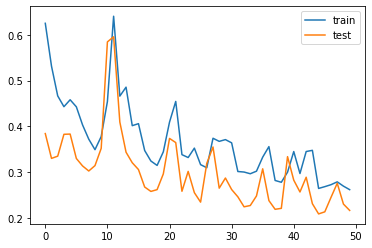

"\n# design network\nmodel = Sequential()\nmodel.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))\nmodel.add(Dense(1))\nmodel.compile(loss='mae', optimizer='adam')\n# fit network\nhistory = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)\n# plot history\nplt.plot(history.history['loss'], label='train')\nplt.plot(history.history['val_loss'], label='test')\nplt.legend()\nplt.show()\n"

In [106]:
# design network
model = Sequential()
model.add(LSTM(500, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=144, validation_data=(test_X, test_y), verbose=2, shuffle=False)#False
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
'''
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
'''

In [107]:
# make a prediction
yhat = model.predict(test_X)

Test RMSE: 0.218


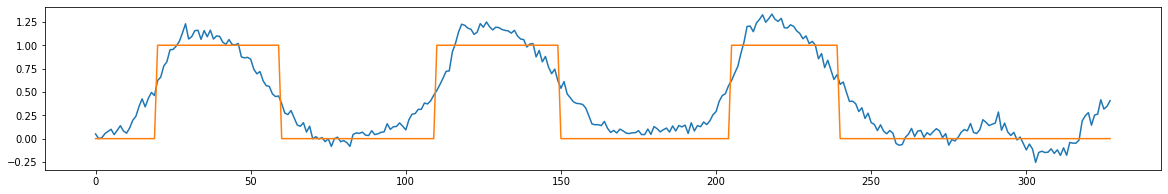

In [49]:
rmse = math.sqrt(mean_squared_error(yhat, test_y))
print('Test RMSE: %.3f' % rmse)
plt.figure(figsize=(20, 3))
plt.plot(yhat)
plt.plot(test_y)
plt.show()

Test RMSE: 0.492


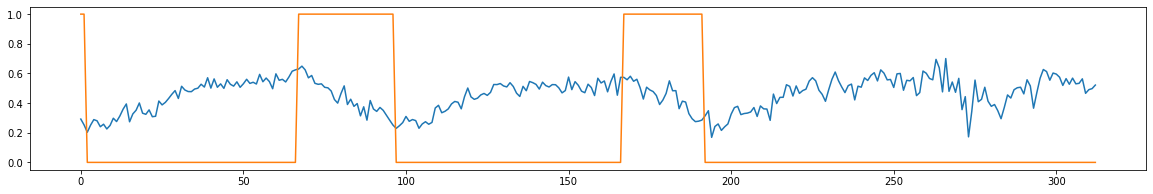

In [57]:
# make a prediction
yhat = model.predict(test_X)
rmse = math.sqrt(mean_squared_error(yhat, test_y))
print('Test RMSE: %.3f' % rmse)
plt.figure(figsize=(20, 3))
plt.plot(yhat)
plt.plot(test_y)
plt.show()

In [53]:
yhat[yhat>0.7] = 1
yhat[(yhat>0.4) & (yhat<0.7) ] = 0.5
yhat[yhat<0.5] = 0

Test RMSE: 0.241


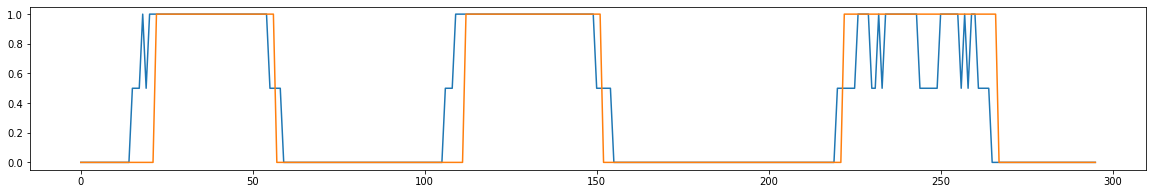

In [54]:
rmse = math.sqrt(mean_squared_error(yhat, test_y))
print('Test RMSE: %.3f' % rmse)
plt.figure(figsize=(20, 3))
plt.plot(yhat)
plt.plot(test_y)
plt.show()

In [173]:
test = values[n_train_hours:, :]

In [174]:
df_drop['方向'][n_train_hours:].reset_index(drop=True)

0      1.0
1     -1.0
2     -1.0
3     -1.0
4     -1.0
      ... 
146   -1.0
147   -1.0
148   -1.0
149   -1.0
150    1.0
Name: 方向, Length: 151, dtype: float64

In [175]:
yhat_p = pd.concat([pd.DataFrame(yhat,columns=['yhat']),df_drop['方向'][n_train_hours:].reset_index(drop=True)],axis= 1)

In [178]:
yhat_p['yp'] = 0
yhat_p['yp'][(yhat_p['yhat']>0.5)&(yhat_p['方向'] == -1)]=0.5
yhat_p['yp'][(yhat_p['yhat']>0.5)&(yhat_p['方向'] == 1)]=1

C:\Users\DodoLu\AppData\Local\Temp\ipykernel_17776\3616949344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yhat_p['yp'][(yhat_p['yhat']>0.5)&(yhat_p['方向'] == -1)]=0.5


Test RMSE: 0.271


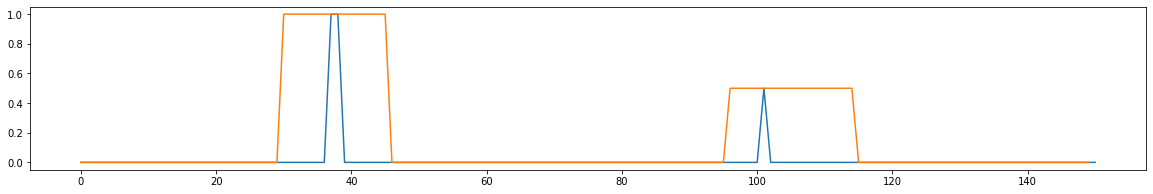

In [179]:
rmse = math.sqrt(mean_squared_error(yhat, test_y))
print('Test RMSE: %.3f' % rmse)
plt.figure(figsize=(20, 3))
plt.plot(yhat_p['yp'])
plt.plot(test_y)
plt.show()

In [96]:
test = np.reshape(test_X,(217, 25))

In [98]:
test = pd.DataFrame(test)

In [99]:
test

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.105040,0.101684,0.108340,0.000152,0.107723,0.107479,0.001483,0.000191,0.003613,0.001917,...,0.000976,0.001440,0.002546,0.109962,0.0,0.0,0.000000,0.109846,0.217500,0.001339
1,0.003155,0.002282,0.108160,0.000901,0.000000,0.001978,0.001777,0.000870,0.001838,0.002329,...,0.094046,0.104753,0.001932,0.104343,0.0,0.0,0.000000,0.001928,0.001931,0.002760
2,0.101574,0.099189,0.149905,0.052183,0.000000,0.104130,0.101891,0.046872,0.104098,0.103531,...,0.095177,0.103443,0.103848,0.146743,0.0,0.0,0.187586,0.150501,0.103607,0.104212
3,0.106206,0.001220,0.001105,0.052902,0.000000,0.001347,0.000710,0.000663,0.001152,0.106160,...,0.001789,0.001507,0.000628,0.001993,0.0,0.0,0.193282,0.108804,0.000756,0.000980
4,0.105796,0.102778,0.108199,0.001976,0.000000,0.001576,0.001161,0.046243,0.001261,0.001362,...,0.000958,0.001154,0.001357,0.000753,0.0,0.0,0.193025,0.109076,0.109478,0.001593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.109031,0.106200,0.158673,0.176353,0.179741,0.156811,0.155160,0.050143,0.453833,0.155246,...,0.143319,0.155083,0.346072,0.156862,0.0,0.0,0.000000,0.000000,0.000000,0.000000
213,0.339663,0.332432,0.395496,0.198834,0.112309,0.331072,0.324139,0.148943,0.331057,0.345895,...,0.502336,0.346020,0.466643,0.329116,0.0,0.0,0.000000,0.000000,0.000000,0.000000
214,0.111988,0.235823,0.453851,0.284559,0.080730,0.157005,0.151967,0.051591,0.672876,0.669454,...,0.224345,0.247583,0.160942,0.247611,0.0,0.0,0.000000,0.000000,0.000000,0.000000
215,0.536856,0.434100,0.491949,0.276520,0.227613,0.441406,0.432164,0.198554,0.441344,0.438739,...,0.417412,0.491698,0.493127,0.452094,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [100]:
yhat = model.predict(train_X)

Test RMSE: 0.359


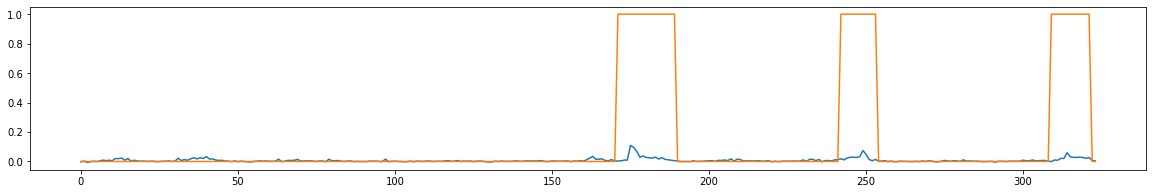

In [101]:
rmse = math.sqrt(mean_squared_error(yhat, train_y))
print('Test RMSE: %.3f' % rmse)
plt.figure(figsize=(20, 3))
plt.plot(yhat)
plt.plot(train_y)
plt.show()

範例

In [ ]:
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

In [49]:
# split into train and test sets
values = reframed.values
n_train_hours = int(len(reframed)*0.4)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(17, 1, 74) (17,) (27, 1, 74) (27,)


範例

In [37]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (32996, 1, 8) (32996,)


Epoch 1/50
1/1 - 3s - loss: 0.0708 - val_loss: 0.6379 - 3s/epoch - 3s/step
Epoch 2/50
1/1 - 0s - loss: 0.0326 - val_loss: 0.6430 - 34ms/epoch - 34ms/step
Epoch 3/50
1/1 - 0s - loss: 0.0370 - val_loss: 0.6202 - 36ms/epoch - 36ms/step
Epoch 4/50
1/1 - 0s - loss: 0.0209 - val_loss: 0.6111 - 41ms/epoch - 41ms/step
Epoch 5/50
1/1 - 0s - loss: 0.0258 - val_loss: 0.6154 - 35ms/epoch - 35ms/step
Epoch 6/50
1/1 - 0s - loss: 0.0178 - val_loss: 0.6306 - 41ms/epoch - 41ms/step
Epoch 7/50
1/1 - 0s - loss: 0.0262 - val_loss: 0.6230 - 38ms/epoch - 38ms/step
Epoch 8/50
1/1 - 0s - loss: 0.0209 - val_loss: 0.6001 - 38ms/epoch - 38ms/step
Epoch 9/50
1/1 - 0s - loss: 0.0158 - val_loss: 0.5914 - 35ms/epoch - 35ms/step
Epoch 10/50
1/1 - 0s - loss: 0.0193 - val_loss: 0.5963 - 32ms/epoch - 32ms/step
Epoch 11/50
1/1 - 0s - loss: 0.0113 - val_loss: 0.6066 - 33ms/epoch - 33ms/step
Epoch 12/50
1/1 - 0s - loss: 0.0156 - val_loss: 0.6035 - 35ms/epoch - 35ms/step
Epoch 13/50
1/1 - 0s - loss: 0.0158 - val_loss: 0.589

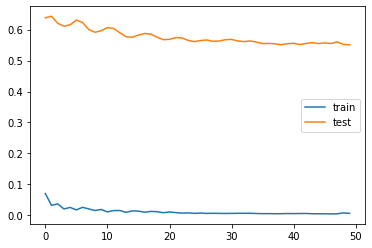

Epoch 1/50
1/1 - 3s - loss: 0.0521 - val_loss: 0.5415 - 3s/epoch - 3s/step
Epoch 2/50
1/1 - 0s - loss: 0.0849 - val_loss: 0.5245 - 64ms/epoch - 64ms/step
Epoch 3/50
1/1 - 0s - loss: 0.0611 - val_loss: 0.4955 - 40ms/epoch - 40ms/step
Epoch 4/50
1/1 - 0s - loss: 0.0384 - val_loss: 0.4842 - 35ms/epoch - 35ms/step
Epoch 5/50
1/1 - 0s - loss: 0.0533 - val_loss: 0.4990 - 37ms/epoch - 37ms/step
Epoch 6/50
1/1 - 0s - loss: 0.0372 - val_loss: 0.5233 - 39ms/epoch - 39ms/step
Epoch 7/50
1/1 - 0s - loss: 0.0340 - val_loss: 0.5383 - 35ms/epoch - 35ms/step
Epoch 8/50
1/1 - 0s - loss: 0.0403 - val_loss: 0.5365 - 33ms/epoch - 33ms/step
Epoch 9/50
1/1 - 0s - loss: 0.0342 - val_loss: 0.5239 - 36ms/epoch - 36ms/step
Epoch 10/50
1/1 - 0s - loss: 0.0251 - val_loss: 0.5088 - 36ms/epoch - 36ms/step
Epoch 11/50
1/1 - 0s - loss: 0.0315 - val_loss: 0.5078 - 33ms/epoch - 33ms/step
Epoch 12/50
1/1 - 0s - loss: 0.0352 - val_loss: 0.5178 - 35ms/epoch - 35ms/step
Epoch 13/50
1/1 - 0s - loss: 0.0267 - val_loss: 0.534

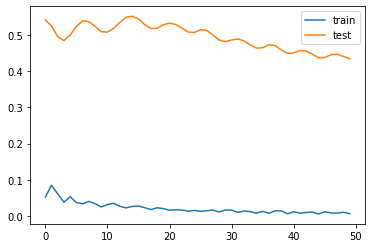

In [27]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [55]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [62]:
inv_yhat = scaler.inverse_transform(inv_yhat)

ValueError: operands could not be broadcast together with shapes (27,74) (75,) (27,74) 

In [23]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

ValueError: operands could not be broadcast together with shapes (27,74) (75,) (27,74) 

In [22]:
test_X 

array([[0.06941649, 0.29411766, 0.34426227, ..., 0.12576102, 0.        ,
        0.        ],
       [0.06841046, 0.30882356, 0.34426227, ..., 0.13130043, 0.        ,
        0.        ],
       [0.05533199, 0.32352942, 0.26229507, ..., 0.13683987, 0.        ,
        0.        ],
       ...,
       [0.01006036, 0.2647059 , 0.26229507, ..., 0.42002335, 0.        ,
        0.        ],
       [0.01006036, 0.2647059 , 0.26229507, ..., 0.4287307 , 0.        ,
        0.        ],
       [0.00804829, 0.2647059 , 0.24590163, ..., 0.43584526, 0.        ,
        0.        ]], dtype=float32)

In [26]:
test_X [:, 1:]

array([[0.29411766, 0.34426227, 0.61818314, ..., 0.12576102, 0.        ,
        0.        ],
       [0.30882356, 0.34426227, 0.61818314, ..., 0.13130043, 0.        ,
        0.        ],
       [0.32352942, 0.26229507, 0.61818314, ..., 0.13683987, 0.        ,
        0.        ],
       ...,
       [0.2647059 , 0.26229507, 0.7818184 , ..., 0.42002335, 0.        ,
        0.        ],
       [0.2647059 , 0.26229507, 0.7818184 , ..., 0.4287307 , 0.        ,
        0.        ],
       [0.2647059 , 0.24590163, 0.7818184 , ..., 0.43584526, 0.        ,
        0.        ]], dtype=float32)

In [13]:
encoder = LabelEncoder() #编码
values[:,4] = encoder.fit_transform(values[:,4]) #将第4列编码
values = values.astype('float32') #使得所有数值类型都是float类型
scaler = MinMaxScaler(feature_range = (0, 1)) #0-1归一化
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1) #调用series_to_supervised函数将数据转为监督数据变成16列
reframed.drop(reframed.columns[[9, 10, 11, 12, 13, 14, 15]], axis= 1,inplace = True) 
values = reframed.values
n_train_hours = 365*24 #一年的小时数
train = values[:n_train_hours, :] #训练集
test = values[n_train_hours:, :] #测试集
train_x, train_y = train[:, :-1], train[:, -1] #训练集特征和标签 
test_x, test_y = test[:, :-1], test[:, -1] #测试集的特征和标签
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1])) #转为LSTM模型的输入格式（samples, timesteps, features）
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1])) #转为LSTM模型的输入格式（samples, timesteps, features）


In [14]:
model = Sequential()
model.add(LSTM(50, input_shape = (train_x.shape[0], train_x.shape[2]))) #8760*8
model.add(Dense(1))
model.compile(loss = "mae",optimizer= "adam")
history =model.fit(train_x, train_y, epochs= 50, batch_size=72, validation_data=(test_x, test_y), verbose=2, shuffle=False)
plt.figure()
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()
plt.show()


Epoch 1/50


ValueError: in user code:

    File "C:\Users\DodoLu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\DodoLu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DodoLu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\DodoLu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\DodoLu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\DodoLu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 8760, 10), found shape=(None, 1, 10)


In [ ]:
from keras.utils.vis_utils import plot_model
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
from numpy import array
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
from keras.models import Sequential, load_model
from sklearn.preprocessing import MinMaxScaler